### Project Overview:
Twitter Sentiment Analysis is a data analytics project that involves \
analyzing a
dataset of tweets to determine the sentiment expressed in each tweet—whether it\
is positive, negative, or neutral. The project aims to gain insights into public\
opinions, trends, and sentiments shared on Twitter, utilizing data analytics\
techniques.

In [1]:
# importing all the required libraries for thr Analysis Process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,classification_report,roc_curve,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
# import the datainto the jupyter notebook and convert it into a dataframe.
df = pd.read_csv(r"C:\Users\guruc\Desktop\charan\datatsets\Twitter_data.csv",encoding='latin-1',names=['target','ids','date','flag','user','text'])
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Data Exploration
- Exploring the Sentiment dataset to understand its structure, features, and size.
- Identifying key variables such as tweet content and sentiment labels.

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4=positive)

2. ids: The id of the tweet ( 2087)

3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5. user: the user that tweeted (robotickilldozr)

6. text: the text of the tweet (Lyx is cool)

In [3]:
datac = df.copy()

In [4]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
datac.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [6]:
datac.duplicated().sum()

0

In [7]:
datac.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
datac.shape

(1600000, 6)

In [33]:
class_count = datac['target'].value_counts()
class_count

0    800000
4    800000
Name: target, dtype: int64

## Exploratory Data Analysis (EDA):

- Conducting exploratory data analysis to gain initial insights into tweet patterns,
sentiment distributions, and temporal trends.
- Utilizing visualizations (e.g., histograms, word clouds) to represent key aspects
of the dataset.

In [37]:
datac['Month'] = datac['date'].apply(lambda date: date.split(' ')[1])
months_count = datac['Month'].value_counts()
months_count

Jun    923608
May    576367
Apr    100025
Name: Month, dtype: int64

Text(0.5, 1.0, 'Tweets during months of 2009')

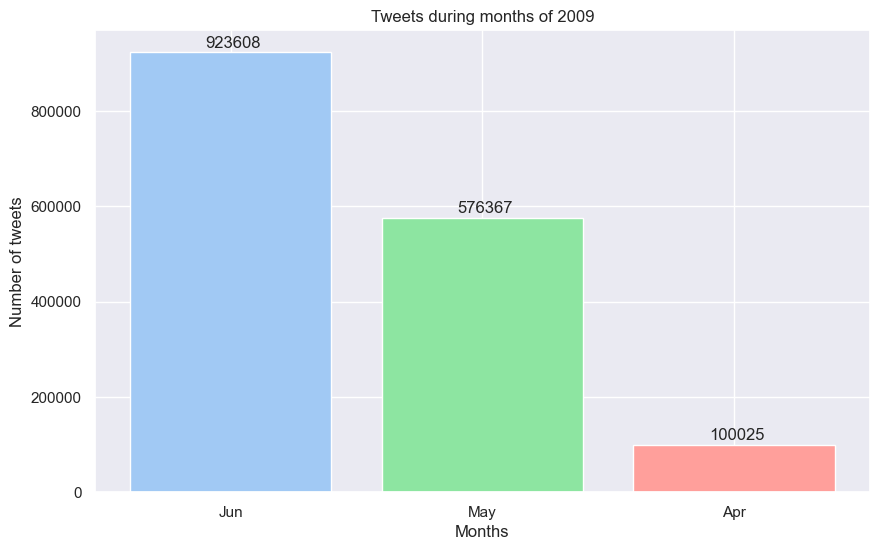

In [38]:
plt.figure(figsize = (10,6))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2009')

## Sentiment Distribution:
- Visualizing the distribution of sentiment labels (positive, negative, neutral) in
the dataset.
- Analyzing the balance of sentiment classes to understand potential biases.

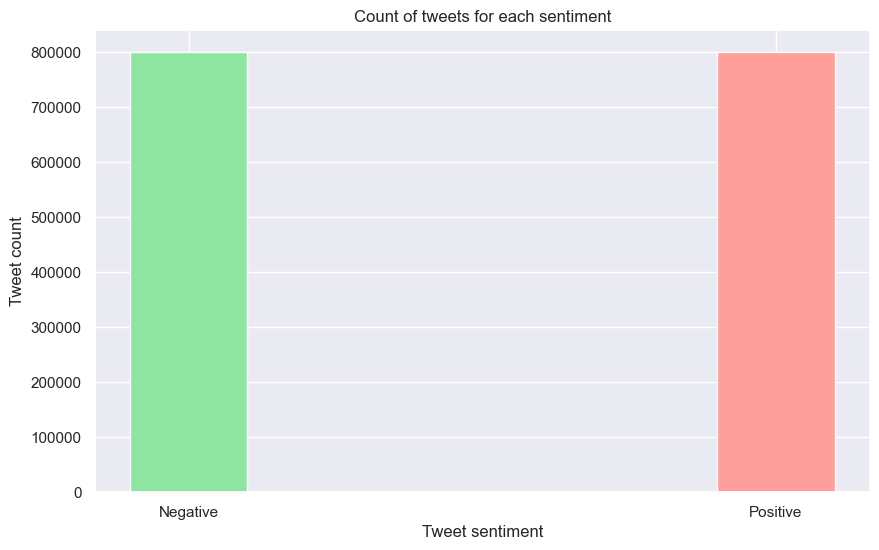

In [35]:
sns.set_theme(palette='pastel')
plt.figure(figsize = (10,6))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.show()

In [43]:
# Splitting the data into sub categories based on positive and negative tweets.
positive_tweets = ' '.join(datac[datac['target'] == 4]['text'])
negative_tweets = ' '.join(datac[datac['target'] == 0]['text'])

In [44]:
pts = wl.lemmatize(positive_tweets)
nts = wl.lemmatize(negative_tweets)

## Word Frequency Analysis:
- Analyzing the frequency of words in tweets to identify common terms and
themes.
- Creating word clouds or bar charts to visualize the most frequent words in
positive and negative sentiments.

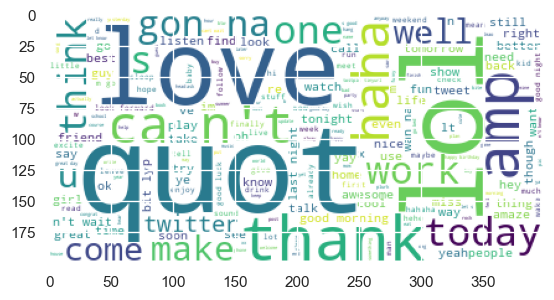

In [48]:
wc = WordCloud(background_color='white').generate(pts)#pass the entire single sting
plt.imshow(wc)
plt.show()

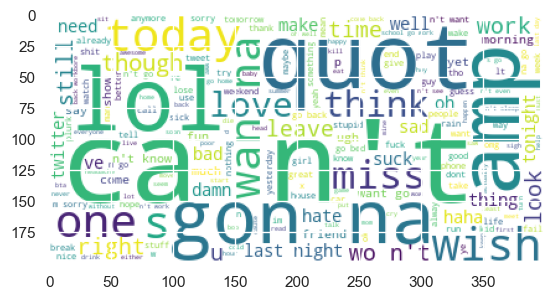

In [49]:
wc = WordCloud(background_color='white').generate(nts)#pass the entire single sting
plt.imshow(wc)
plt.show()

##  Data Cleaning:
- Performing data cleaning tasks to handle missing values, duplicate entries, and
irrelevant information.
- Ensuring data quality by addressing any anomalies or inconsistencies in the
dataset.

In [9]:
# Checking for any unrequired data and removing them.
def edat(data,name):
    case = " ".join(data[name]).islower()
    html_ = data[name].apply(lambda x:True if re.search("<.+?>",x)else False).sum()
    url_ = data[name].apply(lambda x:True if re.search("http[s]?://.+? +",x) else False).sum()
    unwanted_ = data[name].apply(lambda x:True if re.search("[]()\-.,\?!;@#$%^&*0-9]",x)else False).sum()
    if case == False:
        print("not in lower case")
    if html_>0:
        print("have html tags")
    if url_>0:
        print("url's are present")
    if unwanted_>0:
        print("Unwanted characters are present in the data")
    else:
        print("All Clear")

In [10]:
edat(datac,'text')

not in lower case
url's are present
Unwanted characters are present in the data


In [11]:
# preprocessing the text data by removing the unnecessary data from the given data.
def textpp(x,correct):
    x = x.lower()
    x = re.sub("<.+?>"," ",x)
    x = re.sub("http[s]?://.+? +","",x)
    x = re.sub("[]()\-.,\?!;@#$%^&\?*0-9]"," ",x)
    if correct == "t":
        x = TextBlob(x).correct().string
    else:
        x = x
    return x

In [12]:
datac['text'] = datac['text'].apply(textpp,args=('s'))

In [13]:
datac

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww that's a bummer you shou...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no it's not behaving at all ...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com very cool to hear old walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday to my boo of alll time ...


In [14]:
stp = stopwords.words('english')

In [15]:
wl = WordNetLemmatizer()

In [16]:
# Performing advanced Preprocessing on the textual data by imputing the stopwords.
def advpp(x,stemm):
    wl = WordNetLemmatizer()
    l = []
    for word in word_tokenize(x):
        if word in stp:
            pass
        elif stemm == "s":
            l.append(wl.lemmatize(word,pos="v"))
        else:
            l.append(word)
    return " ".join(l)

In [17]:
datac['text'] = datac["text"].apply(advpp,args=('s'))

In [18]:
datac

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww 's bummer shoulda get david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset ca n't update facebook texting might cry...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive many time ball manage save rest ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass 's behave 'm mad ca n't see
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,wake school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interview â « h...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...


In [19]:
datac['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [20]:
# Dividing the data into feature variables and class labels individually
fv = datac.iloc[:,1:]
cv = datac.iloc[:,:1]

In [21]:
fv

,ids,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww 's bummer shoulda get david ca...
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset ca n't update facebook texting might cry...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive many time ball manage save rest ...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass 's behave 'm mad ca n't see
...,...,...,...,...,...
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,wake school best feel ever
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interview â « h...
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask detail
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...


In [82]:
cv = cv["target"]

In [83]:
cv.value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [87]:
fv

0          switchfoot awww 's bummer shoulda get david ca...
1          upset ca n't update facebook texting might cry...
2          kenichan dive many time ball manage save rest ...
3                            whole body feel itchy like fire
4                nationwideclass 's behave 'm mad ca n't see
                                 ...                        
1599995                           wake school best feel ever
1599996    thewdb com cool hear old walt interview â « h...
1599997                       ready mojo makeover ask detail
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

In [88]:
cv

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64

## Sentiment Prediction Model
- Conducting exploratory data analysis to gain initial insights into tweet patterns,
sentiment distributions, and temporal trends.
- Utilizing visualizations (e.g., histograms, word clouds) to represent key aspects
of the dataset.

In [97]:
# Splitting the data into training data and test data.
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [98]:
#creating an Object for the model creation ,use binary = True for implementing binary bagofwords.
cv1 = CountVectorizer(binary=True)

In [99]:
# transforming the data used for model prediction into a sparse matrix
train = cv1.fit_transform(x_train)

In [100]:
train

<1280000x510712 sparse matrix of type '<class 'numpy.int64'>'
	with 9496477 stored elements in Compressed Sparse Row format>

In [101]:
cv1.transform(x_test)

<320000x510712 sparse matrix of type '<class 'numpy.int64'>'
	with 2289817 stored elements in Compressed Sparse Row format>

## Bernoulli's Naive Bayes

In [102]:
b =BernoulliNB(alpha = 0.1)
final_model=b.fit(train,y_train)
final_model.predict(cv1.transform(x_test))
accuracy_score((y_test),final_model.predict(cv1.transform(x_test)))

0.7563875

## Multinomial Naive Bayes

In [103]:
mn =MultinomialNB(alpha = 0.1)
final_model1=mn.fit(train,y_train)
final_model1.predict(cv1.transform(x_test))
accuracy_score((y_test),final_model.predict(cv1.transform(x_test)))

0.7563875

## F1 - Score

In [106]:
f1_score(y_test,final_model.predict(cv1.transform(x_test)),pos_label=4)

0.7520089072689677

In [107]:
print(classification_report(y_test,final_model.predict(cv1.transform(x_test))))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76    160000
           4       0.77      0.74      0.75    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



## Confusion Matrix

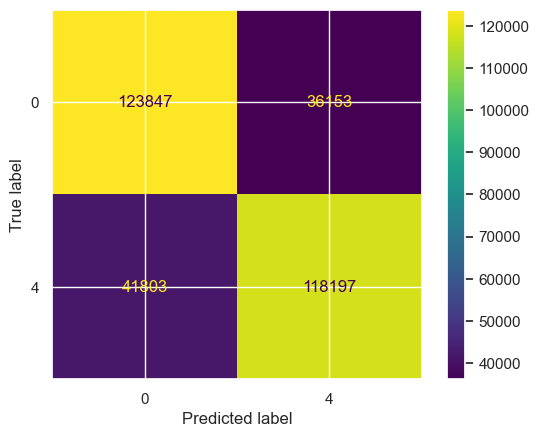

In [109]:
sns.set_theme(style=None)
cm = confusion_matrix(y_test,final_model.predict(cv1.transform(x_test)))
i = ConfusionMatrixDisplay(cm,display_labels=b.classes_)
i.plot()
plt.show()